# IOD Capstone Project 2021
### By Tan Jun-Yen

# Introduction

##### Due to the technological advancements in today's world, many of us have the ease of accessibility to translate foreign languages to us into languages we understand for example from Spanish into English. This proved to be useful when reading articles, news or blog posts from a foreign language we normally would not be able to read. Currently, there are even tools to enable face-to-face communication with others from a different language community through live translation using those advanced tools. This breeds co-existence of different languages within a commmunity, and improves the lifestyle of the minority who speaks only a different language. 

##### However, we forget the deaf community who are unable to communicate through spoken language. Sure there are written methods which helps improve communcation between the deaf community and the rest. But what about emergency situations where written communication is impossible, for example car accidents, fire rescues, situations where written communications are proved to be impossible. 

##### With the help of Machine Learning, we are able to train a model to recognize and understand words signed by the deaf to allow responders not fluent with sign language to immediately understand what the deaf is saying. This allows the responders to quickly assess the situation, and may proof to efficiently address medical attention if the situation requires so. 

##### To train a machine learning model, an abundace of data is required to ensure the accuracy of the model. 

#### Due to time constraints, focusing on training the model to understand American Sign Language (ASL) Alphabets. The project will be focused on understanding how the model classifies ASL Alphabets and improving the performance of the model in identifying ASL Alphabets before diving into the vast vocabulary of ASL. 


# About the Dataset
#### The training data set contains 87,000 images which are 200x200 pixels. There are 29 classes, of which 26 are for the letters A-Z and 3 classes for SPACE, DELETE and NOTHING.These 3 classes are very helpful in real-time applications, and classification.
##### The test data set contains a mere 29 images, to encourage the use of real-world test images.

# Image Processing Notebook

# Table of Contents

## Download ASL ALphabet Datasets from Kaggle

In [1]:
# download ASL-alphabet datasets from kaggle
# !kaggle datasets download -d "grassknoted/asl-alphabet"

## Import Libraries and Packages

In [33]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2
import pickle
import joblib

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

%matplotlib inline

## Set colors to plots using matplotlib color codes

In [3]:
# Seaborn supports assigning colors to plots using matplotlib color codes
sns.set(color_codes=True)
sns.set_style('darkgrid')

## Data Visualisation

In [4]:
# Categorise images by letters
# list files in train folder
filenames = os.listdir("asl-alphabet/asl_alphabet_train/asl_alphabet_train")

# set train folder path
source = ("asl-alphabet/asl_alphabet_train/asl_alphabet_train")

# empty list to append new values to create DataFrame
categories = []
count=[]

# use for loop to label each letter with a numerical value and get count of images for each letter
for img in filenames:
    category = img.split('.')[0]
    if category == 'A':
        categories.append(0)
        count.append(len(os.listdir(os.path.join(source, 'A'))))
    elif category == 'B':
        categories.append(1)
        count.append(len(os.listdir(os.path.join(source, 'B'))))
    elif category == 'C':
        categories.append(2)
        count.append(len(os.listdir(os.path.join(source, 'C'))))
    elif category == 'D':
        categories.append(3)
        count.append(len(os.listdir(os.path.join(source, 'D'))))
    elif category == 'E':
        categories.append(4)
        count.append(len(os.listdir(os.path.join(source, 'E'))))
    elif category == 'F':
        categories.append(5)
        count.append(len(os.listdir(os.path.join(source, 'F'))))
    elif category == 'G':
        categories.append(6)
        count.append(len(os.listdir(os.path.join(source, 'G'))))
    elif category == 'H':
        categories.append(7)
        count.append(len(os.listdir(os.path.join(source, 'H'))))
    elif category == 'I':
        categories.append(8)
        count.append(len(os.listdir(os.path.join(source, 'I'))))
    elif category == 'J':
        categories.append(9)
        count.append(len(os.listdir(os.path.join(source, 'J'))))
    elif category == 'K':
        categories.append(10)
        count.append(len(os.listdir(os.path.join(source, 'K'))))
    elif category == 'L':
        categories.append(11)
        count.append(len(os.listdir(os.path.join(source, 'L'))))
    elif category == 'M':
        categories.append(12)
        count.append(len(os.listdir(os.path.join(source, 'M'))))
    elif category == 'N':
        categories.append(13)
        count.append(len(os.listdir(os.path.join(source, 'N'))))
    elif category == 'O':
        categories.append(14)
        count.append(len(os.listdir(os.path.join(source, 'O'))))
    elif category == 'P':
        categories.append(15)
        count.append(len(os.listdir(os.path.join(source, 'P'))))
    elif category == 'Q':
        categories.append(16)
        count.append(len(os.listdir(os.path.join(source, 'Q'))))
    elif category == 'R':
        categories.append(17)
        count.append(len(os.listdir(os.path.join(source, 'R'))))
    elif category == 'S':
        categories.append(18)
        count.append(len(os.listdir(os.path.join(source, 'S'))))
    elif category == 'T':
        categories.append(19)
        count.append(len(os.listdir(os.path.join(source, 'T'))))
    elif category == 'U':
        categories.append(20)
        count.append(len(os.listdir(os.path.join(source, 'U'))))
    elif category == 'V':
        categories.append(21)
        count.append(len(os.listdir(os.path.join(source, 'V'))))
    elif category == 'W':
        categories.append(22)
        count.append(len(os.listdir(os.path.join(source, 'W'))))
    elif category == 'X':
        categories.append(23)
        count.append(len(os.listdir(os.path.join(source, 'X'))))
    elif category == 'Y':
        categories.append(24)
        count.append(len(os.listdir(os.path.join(source, 'Y'))))
    elif category == 'Z':
        categories.append(25)
        count.append(len(os.listdir(os.path.join(source, 'Z'))))
    elif category == 'del':
        categories.append(26)
        count.append(len(os.listdir(os.path.join(source, 'del'))))
    elif category == 'nothing':
        categories.append(27)
        count.append(len(os.listdir(os.path.join(source, 'nothing'))))
    else:
        categories.append(28)
        count.append(len(os.listdir(os.path.join(source, 'space'))))
        
# create DataFrame 
df = pd.DataFrame({
    'filename': filenames,
    'category': categories,
    'counts'  : count})

In [5]:
# print first 5 rows of DataFrame
df.head()

,filename,category,counts
0,A,0,3000
1,B,1,3000
2,C,2,3000
3,D,3,3000
4,del,26,3000


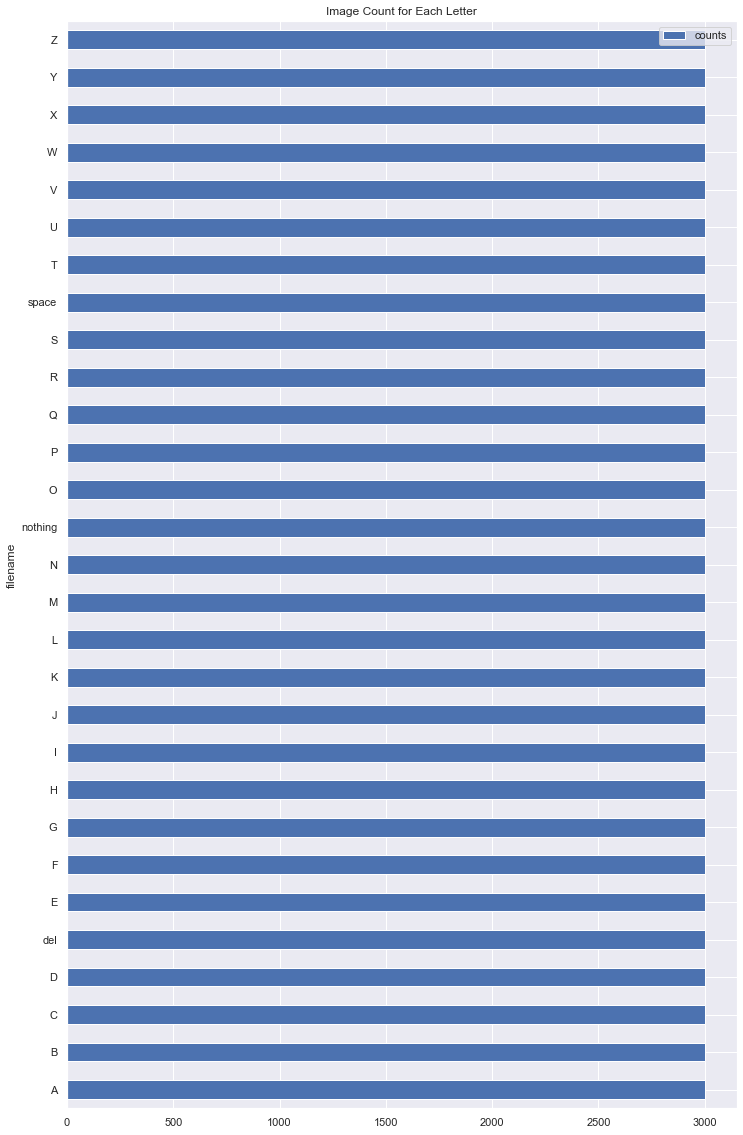

In [6]:
# select columns needed to plot image counts for each letter
counts_letter = df[['filename', 'counts']]

# set index to letters for plotting
counts_letter = counts_letter.set_index(['filename'])

# plotting image count for each letter 
counts_letter.plot(kind='barh', figsize=(12,20))
# set plot title
plt.title("Image Count for Each Letter")
# show plot
plt.show()

In [7]:
# define a new function to get dimensions of images
def get_dims(img):
    """
    get dimensions in height and width of image specified
    """
    # use opencv package to read image
    img = cv2.imread(img)
    # get dimensions in height and weight of image
    h, w = img.shape[:2]
    return h, w

In [8]:
# create empty list to store values for each images, used to create DataFrame later on
height = []
width = []
image_name = []

# use for loop to get each directory in source folder, source variable can be found in the cell above 
for dir1 in os.listdir(source):
    # print notification indicating which stage the code is in
    print("completing file {} ...".format(dir1))
    
    # use for loop to get each image in each directory
    for image in os.listdir(os.path.join(source, dir1)):
        # set image path for each image
        image_path = (os.path.join(source, dir1, image))
        # use defined function and get dimensions of each image using its image path
        h, w = get_dims(image_path)
        # append the dimensions into the empty list
        height.append(h)
        width.append(w)
        
# create a dictionary with the newly appended list
size = {
    "height" : height,
    "width"  : width
        }

completing file A ...
completed file A ...
completing file B ...
completed file B ...
completing file C ...
completed file C ...
completing file D ...
completed file D ...
completing file del ...
completed file del ...
completing file E ...
completed file E ...
completing file F ...
completed file F ...
completing file G ...
completed file G ...
completing file H ...
completed file H ...
completing file I ...
completed file I ...
completing file J ...
completed file J ...
completing file K ...
completed file K ...
completing file L ...
completed file L ...
completing file M ...
completed file M ...
completing file N ...
completed file N ...
completing file nothing ...
completed file nothing ...
completing file O ...
completed file O ...
completing file P ...
completed file P ...
completing file Q ...
completed file Q ...
completing file R ...
completed file R ...
completing file S ...
completed file S ...
completing file space ...
completed file space ...
completing file T ...
complete

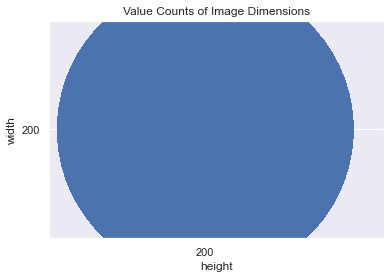

<Figure size 1080x1080 with 0 Axes>

In [9]:
# create a DataFrame using the dictionary
img_size = pd.DataFrame(size, columns=['height', 'width'])
# get the value count of unique dimensions of all images
# used for plotting the size of marker
img_count = img_size['height'].value_counts()

# plot scatterplot showing the value count of different dimensions of images
# set figure and axes
_, ax = plt.subplots()
plt.figure(figsize=(15,15))
# plot scatterplot using img_size DataFrame
ax.scatter(x=img_size['height'], y=img_size['width'], s=img_count) # img_count used to set the shape size of marker
# only show actual tick, as size of marker is large
ax.set_xticks(ticks=[200])
ax.set_yticks(ticks=[200])
# set x and y axis limits, if not plot will be too small to fit the marker
ax.set_xlim(-500, 1000)
ax.set_ylim(-150000, 150000)
# set x and y axis labels
ax.set_xlabel("height")
ax.set_ylabel("width")
# set title 
ax.set_title("Value Counts of Image Dimensions")
# show plot
plt.show()

## Understanding Image DataSets

### Examples of Images in the DataSets

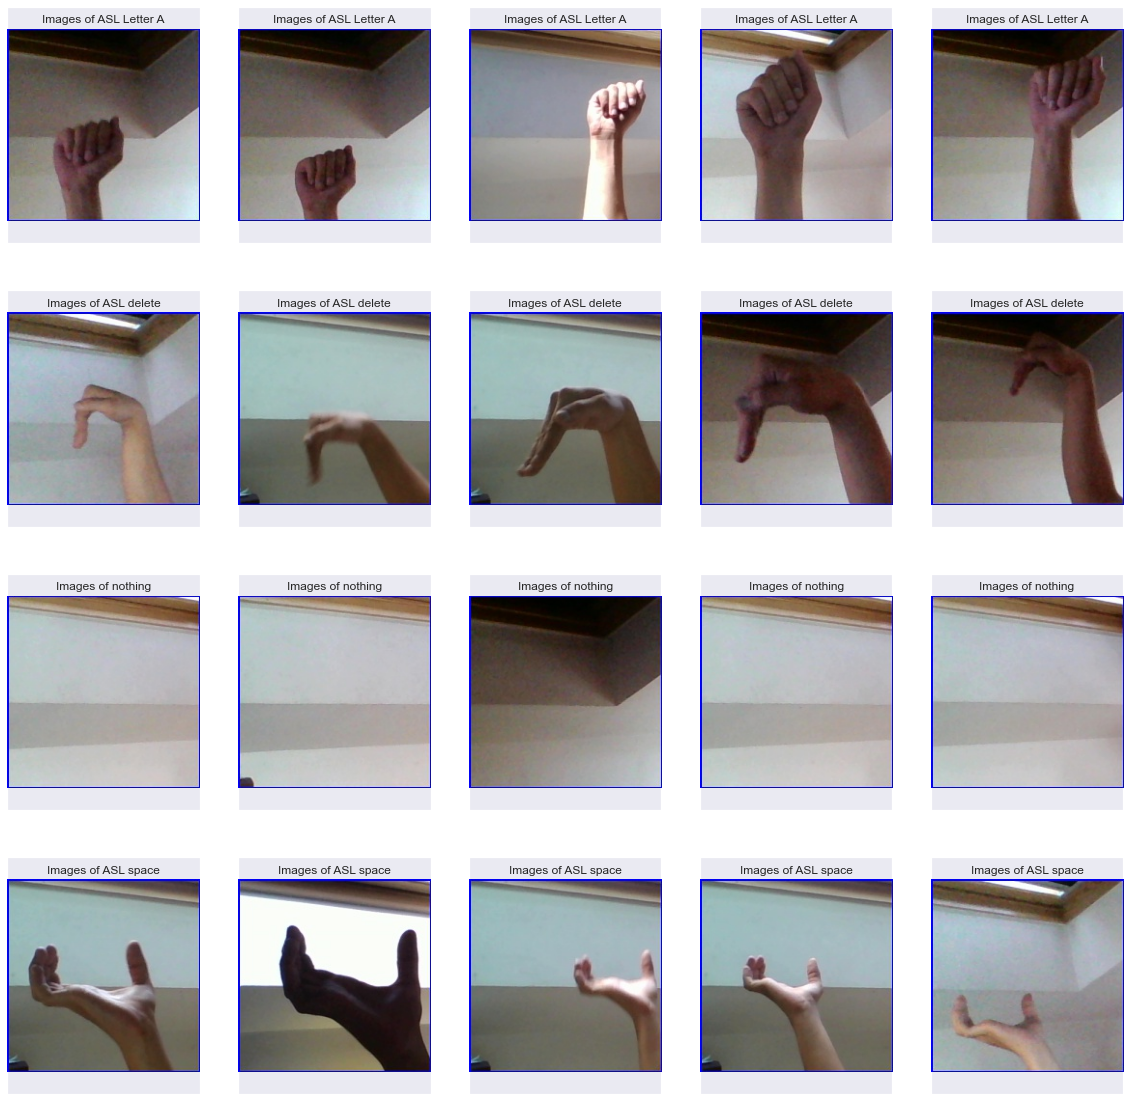

In [10]:
# set figure and axes of plot
fig, ax = plt.subplots(4, 5, figsize=(20,20), sharex="all", sharey="all")
plt.xticks([],[]) # remove ticks on x-axis
plt.yticks([],[]) # remove ticks on y-axis
sns.set_style('white') # set seaborn style with no grid

# print 5 random images from specified directory
for i in range(5):
    
    # print random images from ASL Letter A folder
    image = random.choice(os.listdir(os.path.join(source, "A")))
    # set random image's PATH 
    image_path = os.path.join(source, "A", image)
    # read random image from PATH
    img = mpimg.imread(image_path)
    # set plot for random images
    ax1 = fig.add_subplot(4,5, i+1) # add the plots to existing subplot using index
    ax1.imshow(img) # plot image
    ax1.axis("off") # remove all axis labels and ticks
    ax1.set_title("Images of ASL Letter A") # set title for images
    
    # print random images from ASL del folder
    image = random.choice(os.listdir(os.path.join(source, "del")))
    # set random image's PATH 
    image_path = os.path.join(source, "del", image)
    # read random image from PATH
    img = mpimg.imread(image_path)
    # set plot for random images
    ax2 = fig.add_subplot(4,5, i+6) # add the plots to existing subplot using index
    ax2.imshow(img) # plot image
    ax2.axis("off") # remove all axis labels and ticks
    ax2.set_title("Images of ASL delete") # set title for images
    
    # print random images from ASL nothing folder
    image = random.choice(os.listdir(os.path.join(source, "nothing")))
    # set random image's path
    image_path = os.path.join(source, "nothing", image)
    # read random image from path
    img = mpimg.imread(image_path)
    # set plot for random images
    ax3 = fig.add_subplot(4,5, i+11) # add the plots to existing subplot using index
    ax3.imshow(img) # plot image
    ax3.axis("off") # remove all axis labels and ticks
    ax3.set_title("Images of nothing") # set title for images
    
    # print random images from ASL space folder
    image = random.choice(os.listdir(os.path.join(source, "space")))
    # set random image's PATH 
    image_path = os.path.join(source, "space", image)
    # read random image from PATH
    img = mpimg.imread(image_path)
    # set plot for random images
    ax4 = fig.add_subplot(4,5, i+16) # add the plots to existing subplot using index
    ax4.imshow(img) # plot image
    ax4.axis("off") # remove all axis labels and ticks
    ax4.set_title("Images of ASL space") # set title for images

    # show plot
plt.show()

### Images in RGB

Image 1 shape: (200, 200, 3)
R-G-B Values: [253   3   0]
R-Value: 253
G-Value: 3
B-Value: 0
Image 2 shape: (200, 200, 3)
R-G-B Values: [254   2   0]
R-Value: 254
G-Value: 2
B-Value: 0
Image 3 shape: (200, 200, 3)
R-G-B Values: [253   1   0]
R-Value: 253
G-Value: 1
B-Value: 0


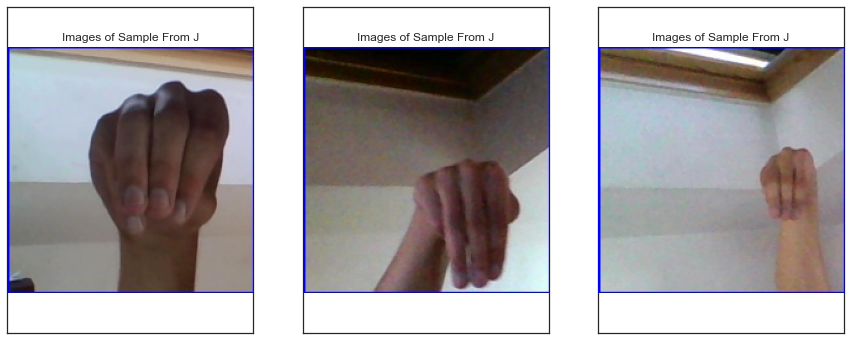

In [11]:
# get path of 3 random images
image_example_dir = os.listdir(os.path.join(source, "M"))
random_image_sample = random.sample(image_example_dir, 3)

# plot the 3 random images
# set figure and axes of plot
fig, ax = plt.subplots(1, 3, figsize=(15,6), sharex="all", sharey="all")
plt.xticks([],[]) # remove ticks on x-axis
plt.yticks([],[]) # remove ticks on y-axis
sns.set_style('white') # set seaborn style with no grid

# use for loop to plot each image, print dimensions/pixel values, and print Pixel Channels
for i in range(3):
    # slice each image path
    image_sample_path = os.path.join(source, "M", random_image_sample[i])
    # use opencv package to read images from path
    image_sample = cv2.imread(image_sample_path)
    # set plot for random images
    ax = fig.add_subplot(1,3, i+1) # add the plots to existing subplot using index
    # plot random images
    ax.imshow(cv2.cvtColor(image_sample, cv2.COLOR_BGR2RGB)) # opencv loads in BGR format by default, let's show it in RGB
    ax.axis("off") # remove all axis labels and ticks
    ax.set_title("Images of Sample From M") # set title for images
    
    # print dimensions/pixel values
    print("Image {} shape: {}".format(i+1, image_sample.shape))
    # print Pixel Channels
    print("R-G-B Values: {}".format(image_sample[0][0]))
    # print R value
    print("R-Value: {}".format((image_sample[0][0])[0]))
    # print G value
    print("G-Value: {}".format((image_sample[0][0])[1]))
    # print B value
    print("B-Value: {}".format((image_sample[0][0])[2]))
    
# show plot
plt.show()

#### RGB Color Channels 

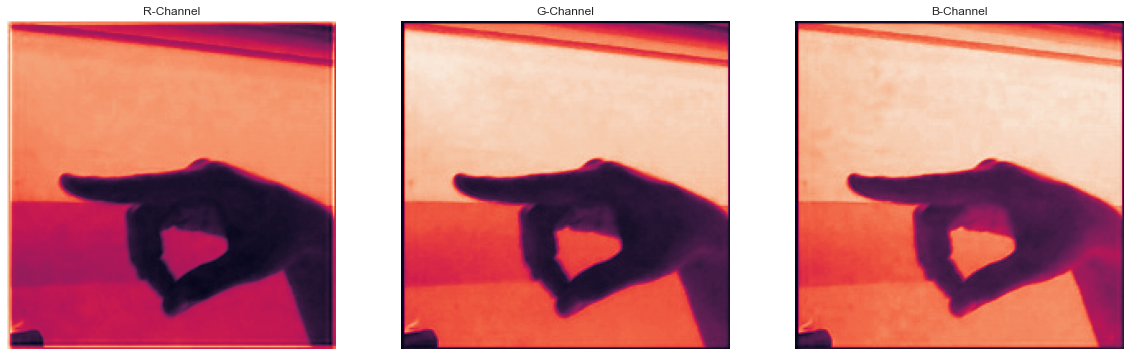

In [12]:
# get path of 3 random images
image_example_dir = os.listdir(os.path.join(source, "P"))
random_image_sample = random.sample(image_example_dir, 3)

# Plot the three channels of the image
fig, axs = plt.subplots(1, 3, figsize = (20, 20))
plt.xticks([],[]) # remove ticks on x-axis
plt.yticks([],[]) # remove ticks on y-axis
sns.set_style('white') # set seaborn style with no grid

# use for loop to read and print through each channel of an image
for i in range(0, 3):
    # set image sample path 
    image_sample_path = os.path.join(source, "P", random_image_sample[2])
    # use opencv package to read images from path
    image_sample = cv2.imread(image_sample_path)
    
    # iterate through axes to plot images
    ax = axs[i]
    # plot each of image sample's three color channel (R, G, B)
    ax.imshow(image_sample[:, :, i])
    # remove all axis labels and ticks
    ax.axis("off") 

# set title for each axes
axs[0].set_title("R-Channel")
axs[1].set_title("G-Channel")
axs[2].set_title("B-Channel")

# show plot
plt.show()

### Images in Greyscale

Image 1 shape: (200, 200)
Pixel Channel: 30
Image 2 shape: (200, 200)
Pixel Channel: 30
Image 3 shape: (200, 200)
Pixel Channel: 28


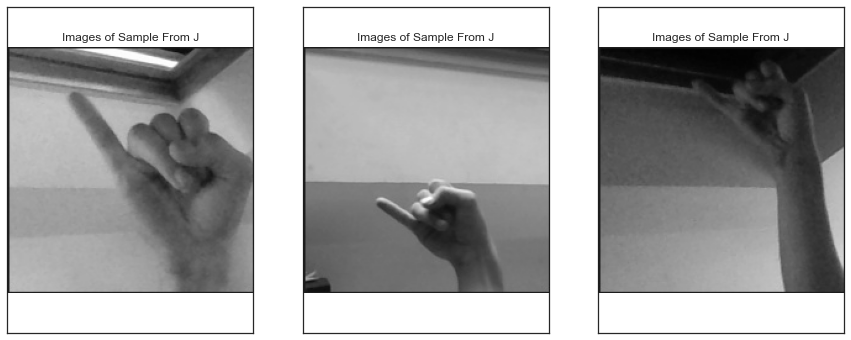

In [13]:
# get path of 3 random images
image_example_dir = os.listdir(os.path.join(source, "J"))
random_image_sample = random.sample(image_example_dir, 3)

# plot the 3 random images
# set figure and axes of plot
fig, ax = plt.subplots(1, 3, figsize=(15,6), sharex="all", sharey="all")
plt.xticks([],[]) # remove ticks on x-axis
plt.yticks([],[]) # remove ticks on y-axis
sns.set_style('white') # set seaborn style with no grid

# use for loop to plot each image, print dimensions/pixel values, and print Pixel Channels
for i in range(3):
    # slice each image path
    image_sample_path = os.path.join(source, "J", random_image_sample[i])
    # use opencv package to read images
    image_sample = cv2.imread(image_sample_path)
    # convert color image to grayscale
    gray_image_sample = cv2.cvtColor(image_sample, cv2.COLOR_BGR2GRAY) # opencv loads in BGR format by default, let's show it in Grayscale
    
    # set plot for random images
    ax = fig.add_subplot(1,3, i+1) # add the plots to existing subplot using index
    # plot random images
    ax.imshow(cv2.cvtColor(gray_image_sample, cv2.COLOR_BGR2RGB)) # opencv loads in BGR format by default, let's show it in RGB
    ax.axis("off") # remove all axis labels and ticks
    ax.set_title("Images of Sample From J") # set title for images
    
    # print dimensions/pixel values
    print("Image {} shape: {}".format(i+1, gray_image_sample.shape))
    # print Pixel Channel
    print("Pixel Channel: {}".format(gray_image_sample[0][0]))
    
# show plot
plt.show()

#### Grayscale Color Channels

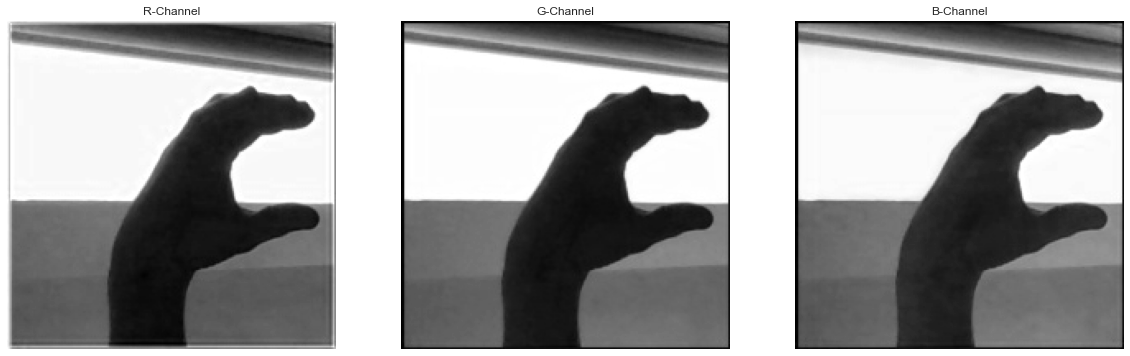

In [14]:
# get path of 3 random images
image_example_dir = os.listdir(os.path.join(source, "C"))
random_image_sample = random.sample(image_example_dir, 3)

# Plot the three channels of the image
fig, axs = plt.subplots(1, 3, figsize = (20, 20))
plt.xticks([],[]) # remove ticks on x-axis
plt.yticks([],[]) # remove ticks on y-axis
sns.set_style('white') # set seaborn style with no grid

# use for loop to read and print through each channel of an image
for i in range(0, 3):
    # set image sample path 
    image_sample_path = os.path.join(source, "C", random_image_sample[2])
    # use opencv package to read images from path
    image_sample = cv2.imread(image_sample_path)
    
    # iterate through axes to plot images
    ax = axs[i]
    # plot each of image sample's three color channel (R, G, B)
    ax.imshow(image_sample[:, :, i], cmap='gray') # set color map to gray to print gray images (darkened images)
    # remove all axis labels and ticks
    ax.axis("off")

# set title for each axes
axs[0].set_title("R-Channel")
axs[1].set_title("G-Channel")
axs[2].set_title("B-Channel")

# show plot
plt.show()

### Images in HSV and HLS

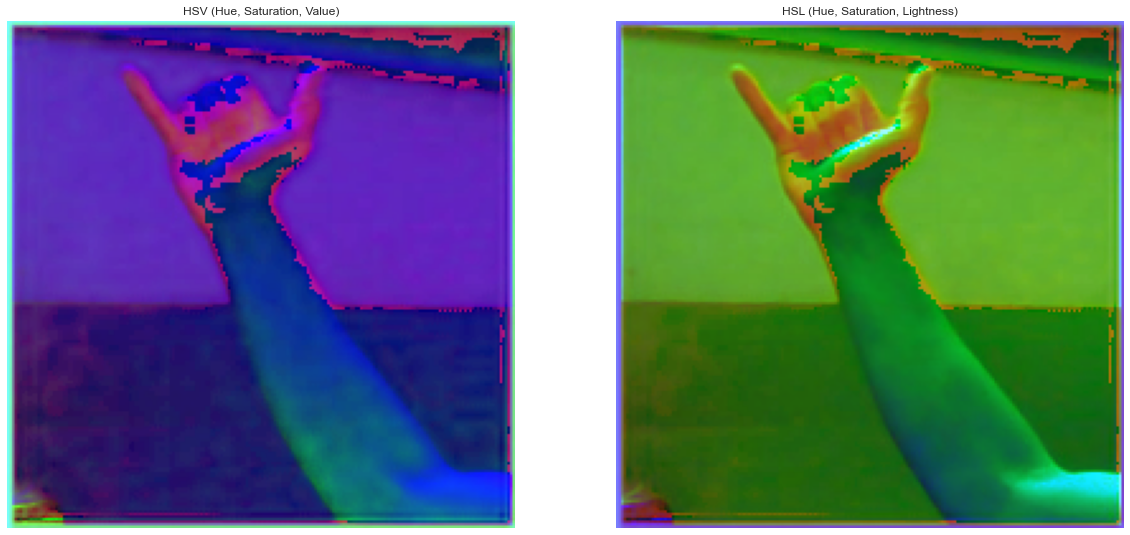

In [15]:
# get path of 3 random images
image_example_dir = os.listdir(os.path.join(source, "Y"))
random_image_sample = random.sample(image_example_dir, 3)

# Plot the three channels of the image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 20))
plt.xticks([],[]) # remove ticks on x-axis
plt.yticks([],[]) # remove ticks on y-axis
sns.set_style('white') # set seaborn style with no grid

# set image sample path 
image_sample_path = os.path.join(source, "Y", random_image_sample[2])

# use opencv package to read images from path
image_sample = cv2.imread(image_sample_path)

# convert color image to HSV, and HSL
image_sample_HSV = cv2.cvtColor(image_sample, cv2.COLOR_BGR2HSV) # opencv loads in BGR format by default, let's show it in HSV
image_sample_HSL = cv2.cvtColor(image_sample, cv2.COLOR_BGR2HLS) # opencv loads in BGR format by default, let's show it in HSL

# plot each of image sample's three color channel (R, G, B)
ax1.imshow(image_sample_HSV)
ax2.imshow(image_sample_HSL)
# remove all axis labels and ticks
ax1.axis("off")
ax2.axis("off")

# set title for each axes
ax1.set_title("HSV (Hue, Saturation, Value)")
ax2.set_title("HSL (Hue, Saturation, Lightness)")

# show plot
plt.show()

#### HSV Color Chanels

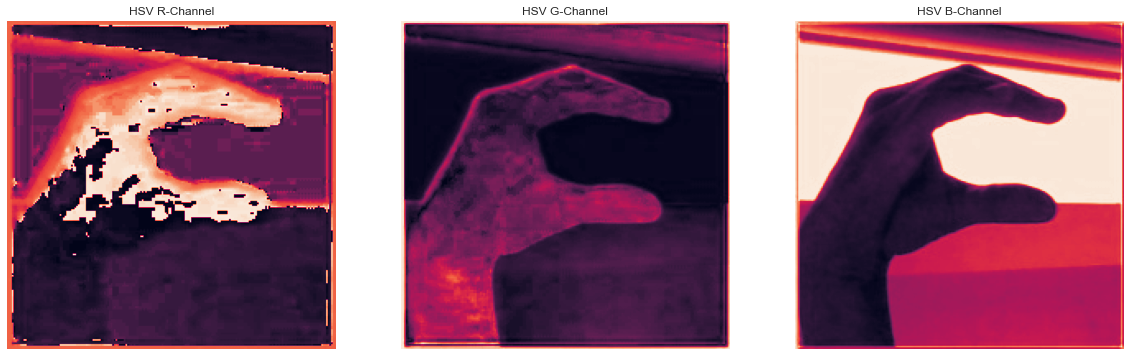

In [16]:
# get path of 3 random images
image_example_dir = os.listdir(os.path.join(source, "C"))
random_image_sample = random.sample(image_example_dir, 3)

# Plot the three channels of the image
fig, axs = plt.subplots(1, 3, figsize = (20, 20))
plt.xticks([],[]) # remove ticks on x-axis
plt.yticks([],[]) # remove ticks on y-axis
sns.set_style('white') # set seaborn style with no grid

# use for loop to read and print through each channel of an image
for i in range(0, 3):
    # set image sample path 
    image_sample_path = os.path.join(source, "C", random_image_sample[2])
    
    # use opencv package to read images from path
    image_sample = cv2.imread(image_sample_path)
    image_sample_HSV = cv2.cvtColor(image_sample, cv2.COLOR_BGR2HSV) # opencv loads in BGR format by default, let's show it in HSV
    
    # iterate through axes to plot images
    ax = axs[i]
    # plot each of image sample's three color channel (R, G, B)
    ax.imshow(image_sample_HSV[:, :, i])
    # remove all axis labels and ticks
    ax.axis("off")

# set title for each axes
axs[0].set_title("HSV R-Channel")
axs[1].set_title("HSV G-Channel")
axs[2].set_title("HSV B-Channel")

# show plot
plt.show()

#### HSL Color Channels

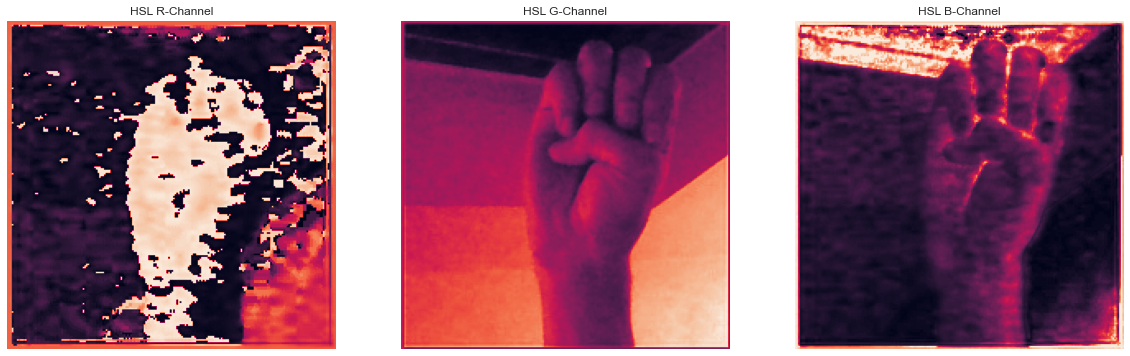

In [17]:
# get path of 3 random images
image_example_dir = os.listdir(os.path.join(source, "E"))
random_image_sample = random.sample(image_example_dir, 3)

# Plot the three channels of the image
fig, axs = plt.subplots(1, 3, figsize = (20, 20))
plt.xticks([],[]) # remove ticks on x-axis
plt.yticks([],[]) # remove ticks on y-axis
sns.set_style('white') # set seaborn style with no grid

# use for loop to read and print through each channel of an image
for i in range(0, 3):
    # set image sample path 
    image_sample_path = os.path.join(source, "E", random_image_sample[2])
    
    # use opencv package to read images from path
    image_sample = cv2.imread(image_sample_path)
    image_sample_HSV = cv2.cvtColor(image_sample, cv2.COLOR_BGR2HLS) # opencv loads in BGR format by default, let's show it in HSV
    
    # iterate through axes to plot images
    ax = axs[i]
    # plot each of image sample's three color channel (R, G, B)
    ax.imshow(image_sample_HSV[:, :, i])
    # remove all axis labels and ticks
    ax.axis("off")

# set title for each axes
axs[0].set_title("HSL R-Channel")
axs[1].set_title("HSL G-Channel")
axs[2].set_title("HSL B-Channel")

# show plot
plt.show()

## Data Preprocessing

### Convert Image into Array

#### Convert Image into RGB Values (Commented Out: Can't run use output array due to system limitations)

In [18]:
#  define new function to load images from source folder
#def create_dataset_RGB(img_folder):
    #"""
    #read image file from source folder and convert into the right color format, resize the image, convert image into a Numpy array with float as datatype 
    #and Normalize image array to have values scaled down between 0 and 1.
    #"""
    # create empty list to store image arrays as X, and label for each image as y
    #X=[]
    #y=[]
    
    # iterate through the list of entries in the directory of specified folder
    #for dir1 in os.listdir(img_folder):
        # print conversion progress of the code
        #print("Converting and Importing images in file {} ...".format(dir1))
        # iterate through the images in the entries of the directory of specified folder
        #for img in os.listdir(os.path.join(img_folder, dir1)):
            # set image path for each image
            #image_path = os.path.join(img_folder, dir1, img)
            # utilise opencv package to read image from specified file
            #image = cv2.imread(image_path, cv2.COLOR_BGR2RGB) # opencv loads in BGR format by default, let's show it in RGB
            # resize image read 
            #image = cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), interpolation=cv2.INTER_AREA) # INTER_AREA is used when shrinking image is needed
            # set image value datatype as float
            #image = image.astype("float")
            # divide 255 to normalize image array to have values between 0 and 1 
            #image /= 255
            # append new image array and label into respective empty list 
            #X.append(image)
            #y.append(dir1)
    
    # set list as array for X and y
    #X_RGB = np.asarray(X) 
    #y_rgb = np.asarray(y)
    
    #return X_RGB, y_rgb

In [19]:
# use defined function to read, convert to RGB, resize image, convert image into array, and normalize data for images datasets
#X_RGB, y_rgb = create_dataset_RGB(source)

In [20]:
# show unique counts for each label in numpy array
#unique, counts = np.unique(y_rgb, return_counts=True)
#dict(zip(unique, counts))

#### Convert Image into Grayscale Values

In [21]:
#  define new function to load images from source folder
def create_dataset_gray(img_folder):
    """
    read image file from source folder and convert into the right color format, resize the image, convert image into a Numpy array with float as datatype 
    and Normalize image array to have values scaled down between 0 and 1.
    """
    # create empty list to store image arrays as X, and label for each image as y
    X=[]
    y=[]
    
    # iterate through the list of entries in the directory of specified folder
    for dir1 in os.listdir(img_folder):
        # print conversion progress of the code
        print("Converting and Importing images in file {} ...".format(dir1))
        # iterate through the images in the entries of the directory of specified folder
        for img in os.listdir(os.path.join(img_folder, dir1)):
            # set image path for each image
            image_path = os.path.join(img_folder, dir1, img)
            # utilise opencv package to read image from specified file
            image = cv2.imread(image_path)
            # utilise opencv package to convert image color
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert image into grayscale image
            # resize image read 
            image = cv2.resize(image, (128, 128), interpolation=cv2.INTER_AREA) # INTER_AREA is used when we need to shrink an image
            # set image value datatype as float
            image = image.astype("float")
            # divide 255 to normalize image array to have values between 0 and 1 
            image /= 255
            # append new image array and label into respective empty list 
            X.append(image)
            y.append(dir1)
    
    # set list as array for X and y
    X = np.asarray(X) 
    y = np.asarray(y)
    
    return X, y

In [22]:
# use defined function to read, convert to grayscale, resize image, convert image into array, and normalize data for images datasets
X, y = create_dataset_gray(source)

Converting and Importing images in file A ...
Converting and Importing images in file B ...
Converting and Importing images in file C ...
Converting and Importing images in file D ...
Converting and Importing images in file del ...
Converting and Importing images in file E ...
Converting and Importing images in file F ...
Converting and Importing images in file G ...
Converting and Importing images in file H ...
Converting and Importing images in file I ...
Converting and Importing images in file J ...
Converting and Importing images in file K ...
Converting and Importing images in file L ...
Converting and Importing images in file M ...
Converting and Importing images in file N ...
Converting and Importing images in file nothing ...
Converting and Importing images in file O ...
Converting and Importing images in file P ...
Converting and Importing images in file Q ...
Converting and Importing images in file R ...
Converting and Importing images in file S ...
Converting and Importing i

In [23]:
# show unique counts for each label in numpy array
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{'A': 3000,
 'B': 3000,
 'C': 3000,
 'D': 3000,
 'E': 3000,
 'F': 3000,
 'G': 3000,
 'H': 3000,
 'I': 3000,
 'J': 3000,
 'K': 3000,
 'L': 3000,
 'M': 3000,
 'N': 3000,
 'O': 3000,
 'P': 3000,
 'Q': 3000,
 'R': 3000,
 'S': 3000,
 'T': 3000,
 'U': 3000,
 'V': 3000,
 'W': 3000,
 'X': 3000,
 'Y': 3000,
 'Z': 3000,
 'del': 3000,
 'nothing': 3000,
 'space': 3000}

### Images after preprocessing

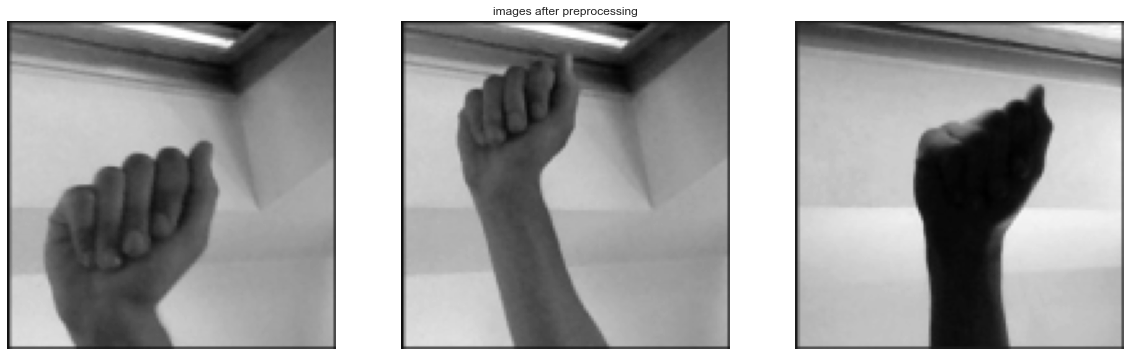

In [24]:
# Plot the three channels of the image
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 20))
plt.xticks([],[]) # remove ticks on x-axis
plt.yticks([],[]) # remove ticks on y-axis
sns.set_style('white') # set seaborn style with no grid

# plot 3 examples of image after preprocessing
ax1.imshow(X[170], cmap='gray')
ax2.imshow(X[500], cmap='gray')
ax3.imshow(X[1000], cmap='gray')

# remove all axis labels and ticks
ax1.axis("off")
ax2.axis("off")
ax3.axis("off")

# set plot title 
ax2.set_title("images after preprocessing")

# show plot
plt.show()

## Encode Output Variable

In [37]:
# convert text label to numeric label
target_dict_1 = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24,
    'Z': 25,
    'del': 26,
    'nothing': 27,
    'space': 28
 }
y_converted = np.array([target_dict_1[y[i]] for i in range(len(y))])
y_converted

array([ 0,  0,  0, ..., 25, 25, 25])

In [35]:
# convert text label to numeric label
# set one hot encoder
encoder  = LabelEncoder()
# fit target to one hot encoder
encoder.fit(y)
# transform target using one hot encoding
encoded_y = encoder.transform(y)
# one hot encoded a
dummy_y = np_utils.to_categorical(encoded_y)

## Split into Training and Validation Data

In [38]:
# split dataset into training and validation data
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=20) # split 80% training data, 20% validation data

## Export Features and Target Arrays for Modelling

In [39]:
# save training and validation data into joblib file 
joblib.dump([X_train, X_test, y_train, y_test], "Split_Processed_Data.sav", compress=1)

['Split_Processed_Data.sav']